## pandas 라이브러리로 데이터프레임 합치기

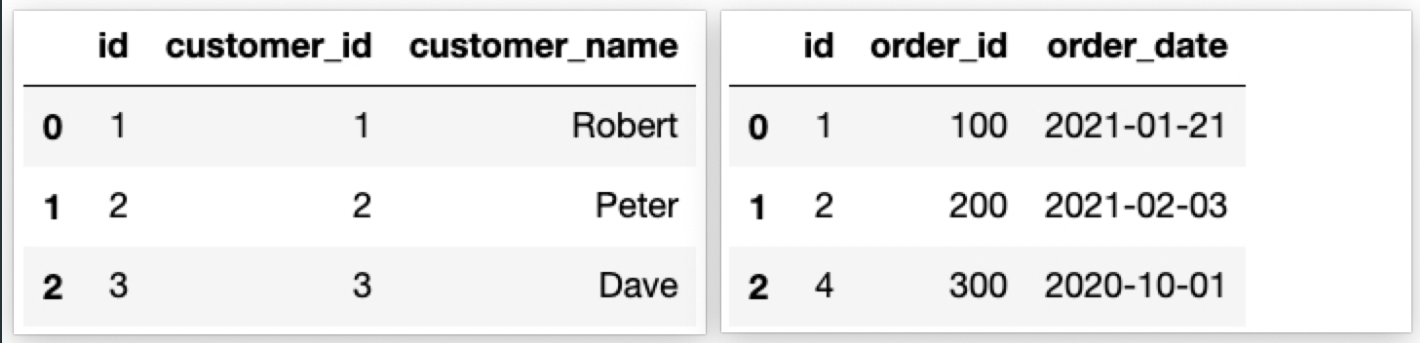

### 데이터 프레임 만들기

In [1]:
import pandas as pd

In [2]:
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'customer_id': [1, 2, 3],
    'customer_name': ['Robert', 'Peter', 'Dave']
})

df1

,id,customer_id,customer_name
0,1,1,Robert
1,2,2,Peter
2,3,3,Dave


In [3]:
df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'order_id': [100, 200, 300],
    'order_date': ['2021-01-21', '2021-02-03', '2020-10-01']
})
df2

,id,order_id,order_date
0,1,100,2021-01-21
1,2,200,2021-02-03
2,4,300,2020-10-01


### concat(): 두 데이터프레임을 연결
- 두 데이터프레임을 위/아래 또는 왼쪽/오른쪽으로 연결하기만 함
- pd.concat([데이터프레임1, 데이터프레임2])

In [4]:
# 위/아래로 합쳐짐 axis=0
pd.concat([df1, df2], axis = 0)

,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,NaN,NaN
1,2,2.0,Peter,NaN,NaN
2,3,3.0,Dave,NaN,NaN
0,1,NaN,NaN,100.0,2021-01-21
1,2,NaN,NaN,200.0,2021-02-03
2,4,NaN,NaN,300.0,2020-10-01


In [5]:
# 왼/오른쪽으로 합쳐짐 axis=1
pd.concat([df1, df2],axis = 1)

,id,customer_id,customer_name,id,order_id,order_date
0,1,1,Robert,1,100,2021-01-21
1,2,2,Peter,2,200,2021-02-03
2,3,3,Dave,4,300,2020-10-01


### merge():두 데이터프레임 병합하기

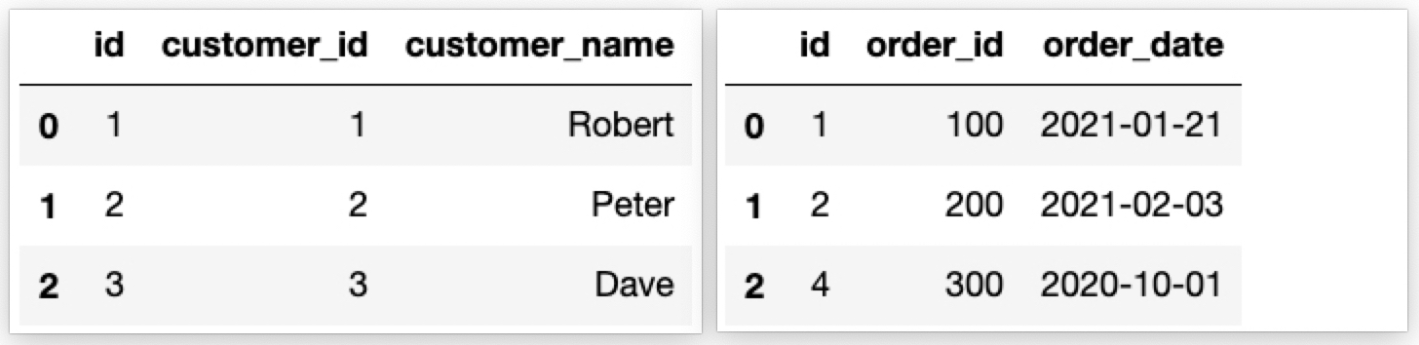

#### merge(): 두 데이터프레임을 합치기
- merge(데이터프레임1, 데이터프레임2) : 두 데이터프레임에 동일한 이름을 가진 컬럼을 기준으로 두 데이터프레임을 합침

In [6]:
pd.merge(df1, df2)

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


- merge(데이터프레임1, 데이터프레임2, on=기준컬럼명) : 기준 컬럼을 명시할 수도 있음

In [7]:
pd.merge(df1, df2, on='id')

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


#### merge() 를 통해 어떻게 두 데이터프레임을 결합시킬 것인가에 대해 보다 상세한 기능을 제공함
- merge(데이터프레임1, 데이터프레임2, how=결합방법) 
- 결합방법
  1. inner : 내부 조인 - SQL의 INNER JOIN 과 동일
  2. outer : 완전 외부 조인 - SQL의 OUTER JOIN 과 동일
  3. left : 왼쪽 우선 외부 조인 - SQL의 LEFT OUTER JOIN 과 동일
  4. right : 오른쪽 우선 외부 조인 - SQL의 RIGHT OUTER JOIN 과 동일

#### 1. inner : 내부 조인 - SQL의 INNER JOIN 과 동일 (디폴트) - 교집합만 남기는 것
- 동작 방식
  1. on의 컬럼값이 두 데이터프레임에서 동일한 행 찾기
  2. 각 동일한 행의 컬럼/컬럼값만 가져오기

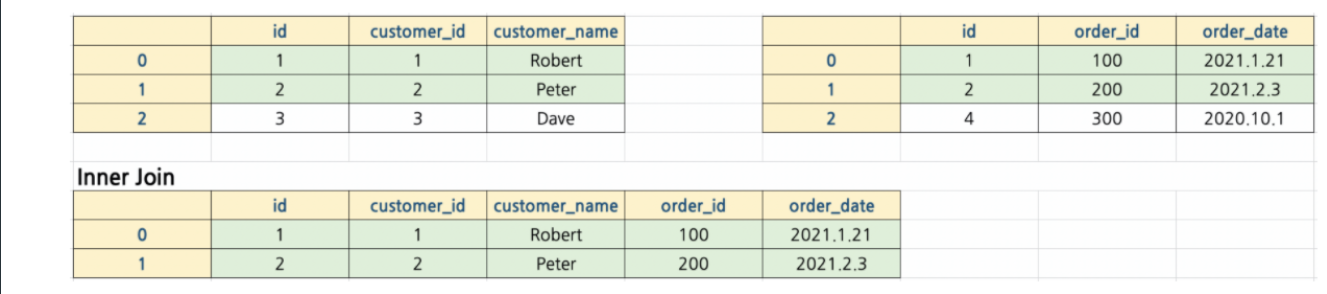

In [8]:
### 사전 선언
import pandas as pd
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'customer_id': [1, 2, 3],
    'customer_name': ['Robert', 'Peter', 'Dave']
}, columns=['id', 'customer_id', 'customer_name'])

df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'order_id': [100, 200, 300],
    'order_date': ['2021-01-21', '2021-02-03', '2020-10-01']
}, columns=['id', 'order_id', 'order_date'])

In [10]:
pd.merge(df1, df2, on = 'id', how = 'inner'  ) 

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


In [11]:
pd.merge(df1, df2, on = 'id')

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


#### 2. outer : 완전 외부 조인 - SQL의 OUTER JOIN 과 동일 - 합집합
- 동작 방식
  1. on의 컬럼값이 두 데이터프레임에서 동일한 행 찾기
  2. 각 동일한 행의 컬럼/컬럼값 가져와 붙이기
  3. 각 데이터프레임에서 on의 컬럼값이 다른 나머지 행을 찾기
  4. 각 나머지 행의 컬럼/컬럼값을 가져와 별도 행으로 붙이기
     - 두 데이터프레임 각각에만 있는 컬럼이어서, 컬럼값이 없을 경우 데이터 없음(NaN)으로 표기하기
     

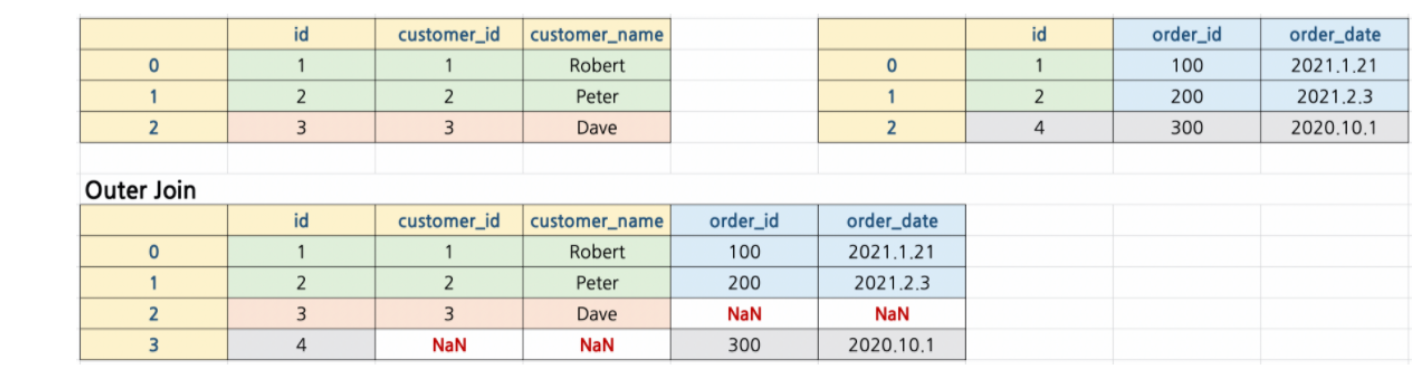

In [13]:
### 사전 선언
import pandas as pd
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'customer_id': [1, 2, 3],
    'customer_name': ['Robert', 'Peter', 'Dave']
}, columns=['id', 'customer_id', 'customer_name'])


df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'order_id': [100, 200, 300],
    'order_date': ['2021-01-21', '2021-02-03', '2020-10-01']
}, columns=['id', 'order_id', 'order_date'])

In [12]:
pd.merge(df1, df2, on = 'id', how = 'outer')

,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,100.0,2021-01-21
1,2,2.0,Peter,200.0,2021-02-03
2,3,3.0,Dave,NaN,NaN
3,4,NaN,NaN,300.0,2020-10-01


#### 3. left : 왼쪽 우선 외부 조인 - SQL의 LEFT OUTER JOIN 과 동일
- 동작 방식
  1. 왼쪽 데이터프레임의 행을 모두 가져오기
  2. 왼쪽 데이터프레임의 행에 있는 on의 컬럼값이 동일한 오른쪽 데이터프레임의 행만 컬럼과 함께 가져와 붙이기
  3. 오른쪽 데이터프레임에 없는 on의 컬럼값을 가진 왼쪽 데이터프레임의 오른쪽 데이터프레임 컬럼들에는 데이터 없음(NaN)으로 표기하기

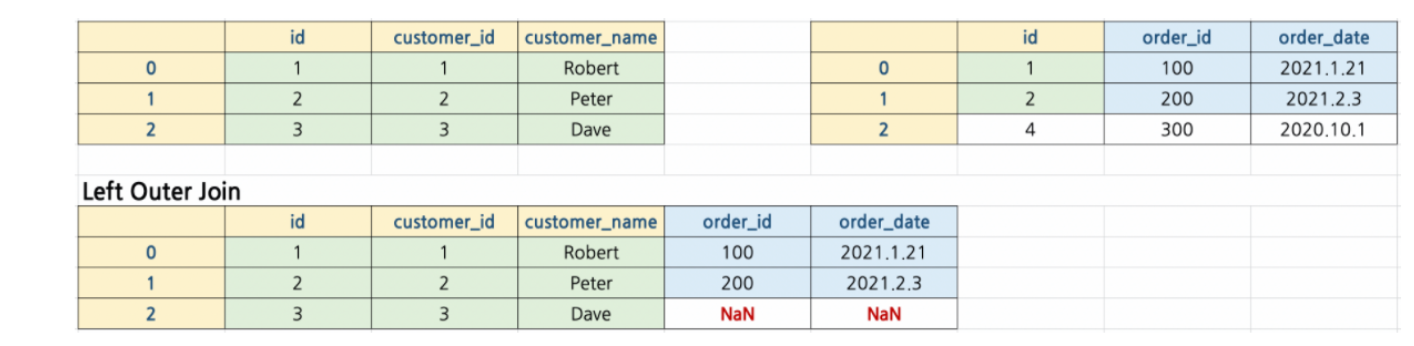

In [13]:
### 사전 선언
import pandas as pd
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'customer_id': [1, 2, 3],
    'customer_name': ['Robert', 'Peter', 'Dave']
}, columns=['id', 'customer_id', 'customer_name'])


df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'order_id': [100, 200, 300],
    'order_date': ['2021-01-21', '2021-02-03', '2020-10-01']
}, columns=['id', 'order_id', 'order_date'])

In [14]:
pd.merge(df1, df2 ,on = 'id', how = 'left')

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100.0,2021-01-21
1,2,2,Peter,200.0,2021-02-03
2,3,3,Dave,NaN,NaN


#### 4. right : 오른쪽 우선 외부 조인 - SQL의 RIGHT OUTER JOIN 과 동일
- 동작 방식
  1. 오른쪽 데이터프레임의 행을 모두 가져오기
  2. 오른쪽 데이터프레임의 행에 있는 on의 컬럼값이 동일한 왼쪽 데이터프레임의 행만 컬럼과 함께 가져와 붙이기
  3. 왼쪽 데이터프레임에 없는 on의 컬럼값을 가진 오른쪽 데이터프레임의 왼쪽 데이터프레임 컬럼들에는 데이터 없음(NaN)으로 표기하기

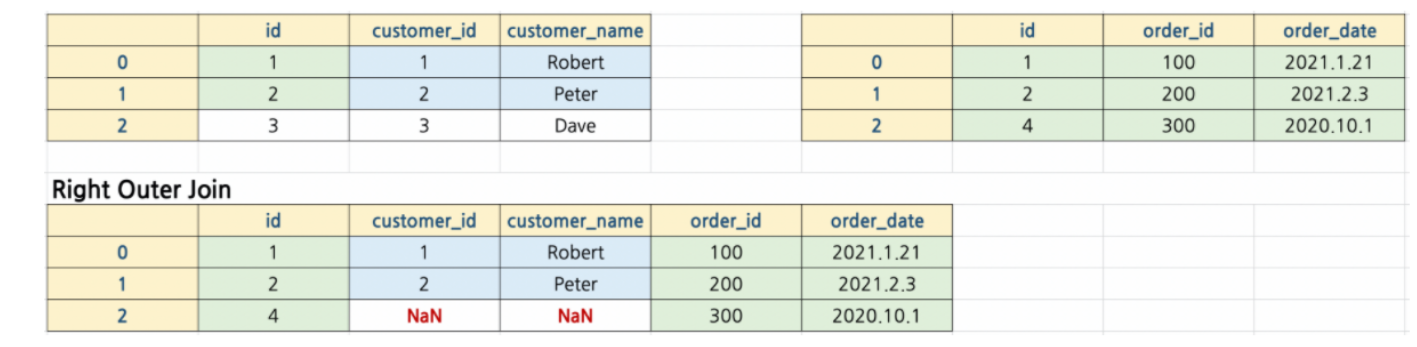

In [15]:
### 사전 선언
import pandas as pd
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'customer_id': [1, 2, 3],
    'customer_name': ['Robert', 'Peter', 'Dave']
}, columns=['id', 'customer_id', 'customer_name'])


df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'order_id': [100, 200, 300],
    'order_date': ['2021-01-21', '2021-02-03', '2020-10-01']
}, columns=['id', 'order_id', 'order_date'])

In [16]:
pd.merge(df1, df2 ,on = 'id', how = 'right')

,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,100,2021-01-21
1,2,2.0,Peter,200,2021-02-03
2,4,NaN,NaN,300,2020-10-01
